# Stock Valuation Using Deep Learning (LSTM Model)
---
### A. Future Price Prediction Using Machine learning (Technical Analysis)
- While stock prices are unpredictable, LSTM model could be the most optimal deep learning model to give us a general idea regarding the momentum of the stock. LSTM models work well at holding long term memories and are capable of learning order dependence in sequence prediction problems, which makes it specifically optimal for this type of problem. As the analysis/prediction is based on the prior patterns of the specific stock's price changes, LSTM could provide a meaningful interpretation of the stock price.

### B. Fundamental Analysis Using Financial Data
i) <ins>Analysis of Stockholder Behavior</ins>
- VIX: Volatility Index
    - VIX signals the level of fear or stress in the stock market. Normally, VIX of above 30 could be interpreted as a bearish market. However, high volatility could be a purchase signal as the market is overreacting, or the stock price is dropping quicker than the market's/company's fundamentals. In other words, low volatility of below 20 could indicate the stock price is rising too quickly, eqaully meaning that it is not the right timing to buy the stock.
<br/><br/>
- RSI: Relative Strength Index compares the bullish and bearish momentum of a specific stock 
    - Similar to VIX index, which provides a general idea of the fear in the market, RSI is company specific. It indicates whether people are overpurchasing or overselling. Again, as the fundamentals of companies cannot change so rapidly, the overpurchasing and overselling can be a signal to not buy or buy.
    
<br/><br/>
ii) <ins>Analysis of the Company</ins>
- PEG: Price/Earnings to Growth Ratio. Other indicators like ROA or EV/EBITA could vary widely depending on the companies sector, which makes it less considerable for this project. 

### C. Optimization of Technical & Fundamental Analysis
- These four indicators will equally contribute to evalutaing whether the stock is to good to purchase or whether it is the correct time to be purchased. 

In [2]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import altair as alt
import numpy as np
import datetime as dt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler


### A)

In [51]:
company = input("Enter company name: ")
start = dt.datetime(2013,1,1)
end = dt.datetime(2022,6,29)
data = web.DataReader(company, 'yahoo', start, end)
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,19.121429,18.178572,18.233213,19.006071,659492400.0,16.394842
2013-01-02,19.821428,19.343929,19.779285,19.608213,560518000.0,16.914257
2013-01-03,19.631071,19.321428,19.567142,19.360714,352965200.0,16.700762
2013-01-04,19.236786,18.779642,19.177500,18.821428,594333600.0,16.235563
2013-01-07,18.903570,18.400000,18.642857,18.710714,484156400.0,16.140062
...,...,...,...,...,...,...
2022-06-23,138.589996,135.630005,136.820007,138.270004,72433800.0,138.270004
2022-06-24,141.910004,139.770004,139.899994,141.660004,89047400.0,141.660004
2022-06-27,143.490005,140.970001,142.699997,141.660004,70207900.0,141.660004


In [41]:
#Preprocess Data

scaler = MinMaxScaler(feature_range=(0,1))     #1. Scales Data from 0 to 1
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

predict_based_on = 50  #How many days in the past do I want to base by prediction on (2 months)
predict_days = 25    #Predict what the price would be after 25 days (1 month)

X_train = [] #2D array
y_train = []


for x in range(predict_based_on, len(scaled_data)-predict_days): #len(scaled_data)-predict_days
    X_train.append(scaled_data[x-predict_based_on:x,0])  #Array of int (x-predict to x days)
    #y_train.append(scaled_data[x,0])
    y_train.append(scaled_data[x+predict_days,0])

In [42]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #(1324, predict_days(=30), 1)

In [43]:
#Build the Model

model = Sequential()

#Experiment with the unit. Too much layer -> Overfitting
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=25, batch_size=32)


Epoch 1/25
6/6 [==============================] - 5s 53ms/step - loss: 0.1224
Epoch 2/25
6/6 [==============================] - 0s 38ms/step - loss: 0.0587
Epoch 3/25
6/6 [==============================] - 0s 33ms/step - loss: 0.0501
Epoch 4/25
6/6 [==============================] - 0s 33ms/step - loss: 0.0448
Epoch 5/25
6/6 [==============================] - 0s 45ms/step - loss: 0.0425
Epoch 6/25
6/6 [==============================] - 0s 41ms/step - loss: 0.0398
Epoch 7/25
6/6 [==============================] - 0s 58ms/step - loss: 0.0355
Epoch 8/25
6/6 [==============================] - 0s 35ms/step - loss: 0.0351
Epoch 9/25
6/6 [==============================] - 0s 37ms/step - loss: 0.0364
Epoch 10/25
6/6 [==============================] - 0s 35ms/step - loss: 0.0366
Epoch 11/25
6/6 [==============================] - 0s 35ms/step - loss: 0.0393
Epoch 12/25
6/6 [==============================] - 0s 35ms/step - loss: 0.0416
Epoch 13/25
6/6 [==============================] - 0s 35ms/st

8/8 [==============================] - 2s 12ms/step


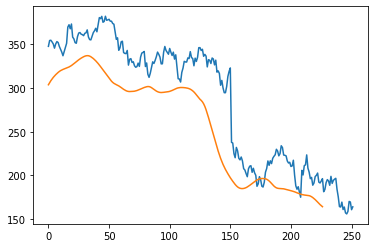

In [44]:
#Test the model 

test_start = dt.datetime(2020,6,2)
test_end = dt.datetime.now()

test_data = web.DataReader(company, 'yahoo', test_start, test_end)
actual_price = test_data['Close'].values


total_data = pd.concat((data['Close'], test_data['Close']), axis=0)

model_input = total_data[len(total_data)-len(test_data)-predict_based_on+predict_days:].values #+predict_days
model_input = model_input.reshape(-1,1)
model_input = scaler.transform(model_input)

X_test = []

for x in range(predict_based_on, len(model_input)):
    X_test.append(model_input[x-predict_based_on:x, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

predicted_prices

a = plt.plot(actual_price) #Predicted day starts from (predict_based_on+predict_days)
b = plt.plot(predicted_prices)


In [45]:
len(predicted_prices)

227

In [13]:
pred_av = predicted_prices[len(predicted_prices)-10:].sum()/10 #Predicted average of 2 week average-stock price after ~ days
curr_av = actual_price[len(actual_price)-10:].sum()/10 #Recent 2 week average stock price

share_price_growth = (pred_av-curr_av)/curr_av
share_price_growth*=100



NameError: name 'predicted_prices' is not defined

In [47]:
test_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-30,352.920013,347.170013,352.170013,347.709991,15107500,347.709991
2021-07-01,354.670013,346.500000,346.820007,354.390015,17137000,354.390015
2021-07-02,356.440002,352.619995,355.100006,354.700012,11521300,354.700012
2021-07-06,358.790009,349.179993,356.500000,352.779999,13488500,352.779999
2021-07-07,356.489990,350.000000,355.260010,350.489990,14218900,350.489990
...,...,...,...,...,...,...
2022-06-23,159.750000,154.250000,156.270004,158.750000,40499200,158.750000
2022-06-24,170.250000,161.300003,161.729996,170.160004,61991200,170.160004
2022-06-27,171.750000,168.009995,171.320007,169.490005,29174600,169.490005


In [12]:
VIX, RSI, PEG = input("Enter VIX, RSI, PEG, ROA: ").split()

# VIX, RSI, PEG & share_price_growth
if 0 < VIX <= 10:
    VIX = 0
elif 11 < VIX <= 20:
    VIX = 1
elif 21 < VIX <= 30:
    VIX = 2
elif 31 < VIX <= 40:
    VIX = 3
elif 40 < VIX <= 50:
    VIX = 4
else:
    VIX = 5

if 0 < RSI <= 10:
    RSI = 5
elif 10 < RSI <= 20:
    RSI = 4
elif 20 < RSI <= 30:
    RSI = 3
elif 30 < RSI <= 40:
    RSI = 2
elif 40 < RSI <= 50:
    RSI = 1
else:
    RSI = 0

if 0 < PEG <= 0.5:
    PEG = 5
elif 0.5 < PEG <= 1:
    PEG = 4
elif 1 < PEG <= 1.5:
    PEG = 3
elif 1.5 < PEG <= 2.5:
    PEG = 2
elif 2.5 < PEG <= 3.5:
    PEG = 1
else: 
    PEG = 0

if share_price_growth < 0:
    share_price_growth = 0
elif 0 <= share_price_growth <= 1:
    share_price_growth = 1
elif 1 < share_price_growth <= 2:
    share_price_growth = 2
elif  2 <= share_price_growth <= 5:
    share_price_growth = 3
elif 5 <= share_price_growth <= 10:
    share_price_growth = 4
else:
    share_price_growth = 5

Res = ((VIX*2) + (PEG*2) + RSI + share_price_growth)/5

Res


'2'